In [4]:
import pandas as pd
import numpy as np
import os


directory = 'G:/SHRUTI/STUDIES/Data Science/Gerabox data set/'

csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

dataframes = []
for file in csv_files:
    state = file[0]  # First letter of the file name
    load = int(file.split('.')[0][5:])  #Load 
    df = pd.read_csv(os.path.join(directory, file))
    df['state'] = state
    df['load'] = load
    dataframes.append(df)

# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes).reset_index().rename(columns={'index':'sample_index'})

In [5]:
combined_df.replace([np.inf, -np.inf], np.nan, inplace=True)
combined_df.dropna(inplace=True)

In [6]:
#Preview of data
combined_df 
print(combined_df.info())
print(combined_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021119 entries, 0 to 2021118
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   sample_index  int64  
 1   a1            float64
 2   a2            float64
 3   a3            float64
 4   a4            float64
 5   state         object 
 6   load          int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 107.9+ MB
None
sample_index    0
a1              0
a2              0
a3              0
a4              0
state           0
load            0
dtype: int64


In [10]:
print(combined_df.describe())
print(combined_df['state'].value_counts())
print(combined_df['load'].value_counts())

       sample_index            a1            a2            a3            a4  \
count  2.021119e+06  2.021119e+06  2.021119e+06  2.021119e+06  2.021119e+06   
mean   5.083360e+04  1.341575e-03  2.589083e-04  4.453338e-03  6.101136e-04   
std    2.969497e+04  6.157919e+00  4.408471e+00  3.963242e+00  4.466629e+00   
min    0.000000e+00 -5.872160e+01 -3.294430e+01 -2.916740e+01 -3.133450e+01   
25%    2.526350e+04 -3.265495e+00 -2.432110e+00 -2.116310e+00 -2.373490e+00   
50%    5.052700e+04 -7.987520e-02  9.292100e-02  4.860470e-02  1.161210e-01   
75%    7.579100e+04  3.135560e+00  2.582300e+00  2.196570e+00  2.483190e+00   
max    1.144310e+05  5.670660e+01  3.092830e+01  2.693890e+01  3.734990e+01   

               load  
count  2.021119e+06  
mean   4.564659e+01  
std    2.865902e+01  
min    0.000000e+00  
25%    2.000000e+01  
50%    5.000000e+01  
75%    7.000000e+01  
max    9.000000e+01  
state
h    1015808
b    1005311
Name: count, dtype: int64
load
20    222976
90    212480
8

array([[<Axes: title={'center': 'sample_index'}>,
        <Axes: title={'center': 'a1'}>],
       [<Axes: title={'center': 'a2'}>, <Axes: title={'center': 'a3'}>],
       [<Axes: title={'center': 'a4'}>, <Axes: title={'center': 'load'}>]],
      dtype=object)

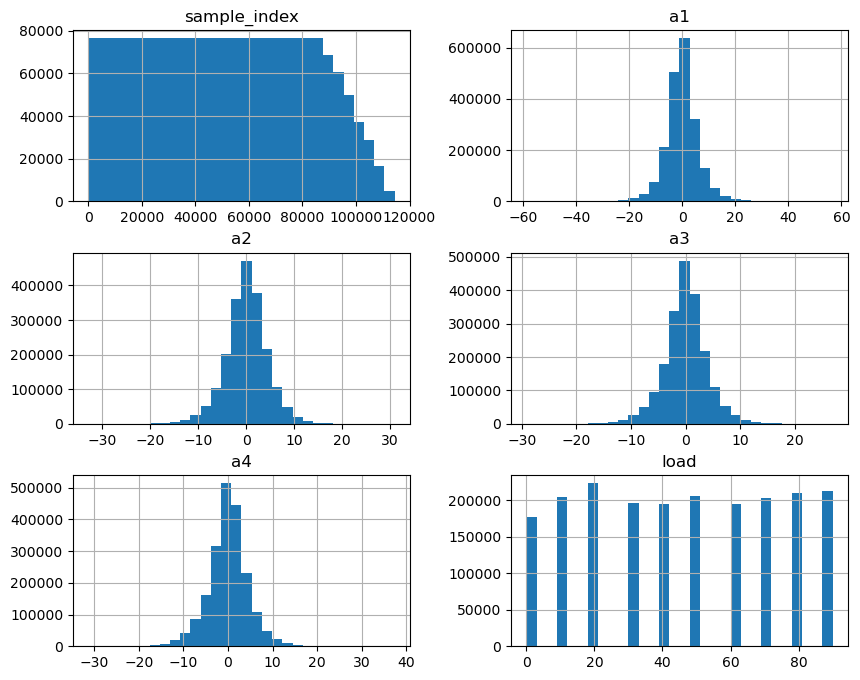

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

combined_df.hist(bins=30, figsize=(10, 8))

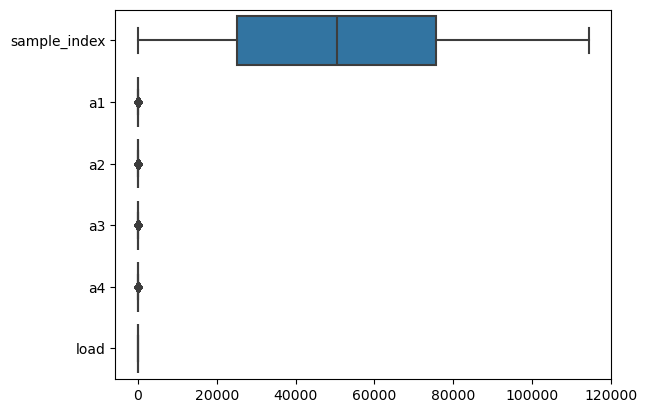

In [13]:
sns.boxplot(data=combined_df, orient="h")  #To identify outliers
plt.show()

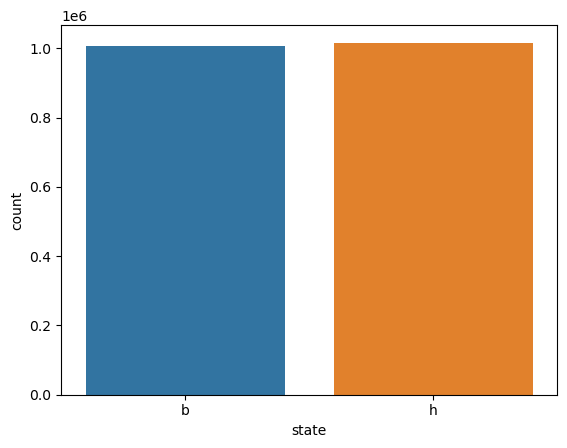

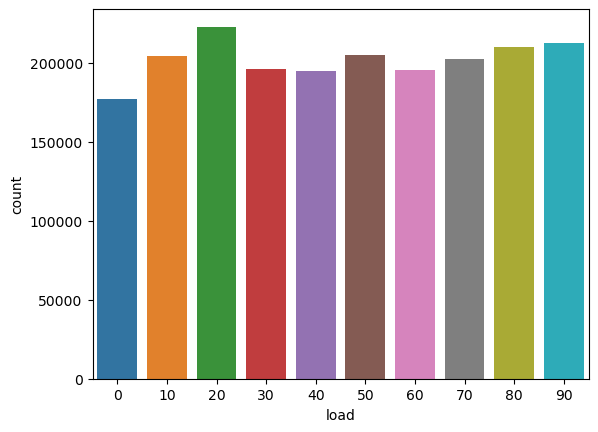

In [16]:
sns.countplot(x='state', data=combined_df)  #dataset is balanced
plt.show()

sns.countplot(x='load', data=combined_df)
plt.show()

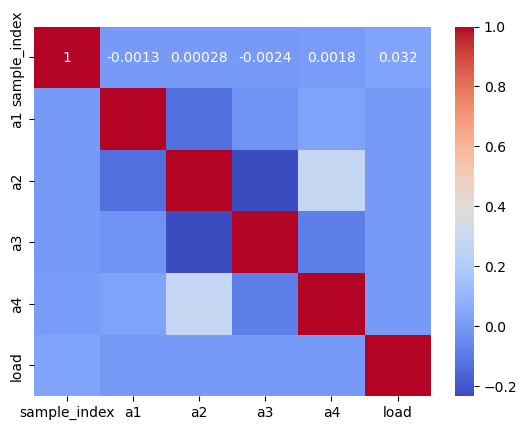

In [19]:
# Filter numeric columns only
numeric_df = combined_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [38]:
from scipy import stats

# Calculate z-scores
z_scores = stats.zscore(combined_df.select_dtypes(include=[np.number]))

# Identify outliers (z-score > 3 or < -3)
outliers = (z_scores > 3) | (z_scores < -3)

# Count outliers per row
outliers_count = outliers.sum(axis=1)
print(outliers_count.value_counts())

# Optional: Remove rows with outliers
cleaned_df = combined_df[(outliers_count == 0)]

print(f"Original dataframe shape: {combined_df.shape}")
print(f"Cleaned dataframe shape: {cleaned_df.shape}")

# Continue with analysis or model building using cleaned_df


0    1935292
1      77134
2       7930
3        728
4         35
Name: count, dtype: int64
Original dataframe shape: (2021119, 7)
Cleaned dataframe shape: (1935292, 7)
